To make an analysis of the weather form website that changes all the time, we create a csv files with data on that time we made an analysis.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_days = pd.read_csv('days_data.csv')

print(data_days.head())
data_days.info()

  Day of the Week  Date  Month High Temperature Low Temperature  \
0          Monday  29th  April              24°             18°   
1         Tuesday  30th  April              24°             18°   
2       Wednesday   1st    May              24°             17°   
3        Thursday   2nd    May              24°             18°   
4          Friday   3rd    May              25°             17°   

                               Conditions  
0               Misty and a gentle breeze  
1  Light rain showers and a gentle breeze  
2     Sunny intervals and a gentle breeze  
3     Sunny intervals and a gentle breeze  
4             Sunny and a moderate breeze  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Day of the Week   13 non-null     object
 1   Date              13 non-null     object
 2   Month             13 non-null     object
 

In [150]:
data_hour = pd.read_csv('hourly_data.csv')

print(data_hour.head())
data_hour.info()

  Unnamed: 0 Humidity 29th April Humidity 30th April Humidity 1st May  \
0      06:00                 93%                 91%              93%   
1      07:00                 91%                 90%              89%   
2      08:00                 87%                 84%              83%   
3      09:00                 83%                 82%              79%   
4      10:00                 77%                 76%              73%   

  Humidity 2nd May Humidity 3rd May Humidity 4th May Humidity 5th May  \
0              92%              90%              83%              71%   
1              90%              85%              78%              77%   
2              83%              78%              72%              70%   
3              80%              75%              67%              65%   
4              74%              70%              62%              59%   

  Humidity 6th May Humidity 7th May  ... Visibility 2nd May  \
0              69%              85%  ...               Good

In [151]:

current_year = pd.Timestamp.now().year
column_date = data_days['Date'] + " " + data_days['Month'] + " " + str(current_year)
data_days['Full Date'] = column_date
print(data_days)

   Day of the Week  Date  Month High Temperature Low Temperature  \
0           Monday  29th  April              24°             18°   
1          Tuesday  30th  April              24°             18°   
2        Wednesday   1st    May              24°             17°   
3         Thursday   2nd    May              24°             18°   
4           Friday   3rd    May              25°             17°   
5         Saturday   4th    May              26°             17°   
6           Sunday   5th    May              26°             16°   
7           Monday   6th    May              27°             17°   
8          Tuesday   7th    May              26°             16°   
9        Wednesday   8th    May              27°             17°   
10        Thursday   9th    May              25°             17°   
11          Friday  10th    May              26°             16°   
12        Saturday  11th    May              26°             17°   

                                Conditions     

In [152]:
print(data_days.isnull().sum())

Day of the Week     0
Date                0
Month               0
High Temperature    0
Low Temperature     0
Conditions          0
Full Date           0
dtype: int64


In [153]:
data_days['High Temperature Num'] = data_days['High Temperature'].str.replace('°', '').astype(int)
data_days['Low Temperature Num'] = data_days['Low Temperature'].str.replace('°', '').astype(int)
# print(data_days)

In [154]:
# count max of high temperature
print(f"Highest temperature on the day {data_days.loc[data_days['High Temperature Num'].idxmax(), 'Full Date']}: {data_days['High Temperature'].max()}")
# count min of high temperature
print(f"Lowest of highest temperature on the day {data_days.loc[data_days['High Temperature Num'].idxmin(), 'Full Date']}: {data_days['High Temperature'].min()}\n")

# count max of low temperature
print(f"Highest temperature of the low temperature on the day {data_days.loc[data_days['Low Temperature Num'].idxmax(), 'Full Date']}: {data_days['Low Temperature'].max()}")
# count min of low temperature
print(f"Lowest temperature on the day {data_days.loc[data_days['Low Temperature Num'].idxmin(), 'Full Date']}: {data_days['Low Temperature'].min()}\n")

# count mean of high temperature
print(f"Mean of the High temperature: {data_days['High Temperature Num'].mean()}")
# count mean of low temperature
print(f"Mean of the Low temperature: {data_days['Low Temperature Num'].mean()}\n")

# count median of high temperature
print(f"Median of the High temperature: {data_days['High Temperature Num'].median()}")
# count median of low temperature
print(f"Median of the Low temperatures: {data_days['Low Temperature Num'].median()}\n")

# count mode of high temperature
print(f"Mode of the High temperature: {data_days['High Temperature Num'].mode()}")
# count mode of low temperature
print(f"Mode of the Low temperature: {data_days['Low Temperature Num'].mode()}\n")

# count standard deviation of high temperature
print(f"Standard deviation of the High temperature: {data_days['High Temperature Num'].std()}")
# count standard deviation of low temperature
print(f"Standard deviation of the Low temperature: {data_days['Low Temperature Num'].std()}")

Highest temperature on the day 6th May 2024: 27°
Lowest of highest temperature on the day 29th April 2024: 24°

Highest temperature of the low temperature on the day 29th April 2024: 18°
Lowest temperature on the day 5th May 2024: 16°

Mean of the High temperature: 25.384615384615383
Mean of the Low temperature: 17.0

Median of the High temperature: 26.0
Median of the Low temperatures: 17.0

Mode of the High temperature: 0    26
Name: High Temperature Num, dtype: int64
Mode of the Low temperature: 0    17
Name: Low Temperature Num, dtype: int64

Standard deviation of the High temperature: 1.1208970766356101
Standard deviation of the Low temperature: 0.7071067811865476


In [155]:
print(data_days['Conditions'].value_counts())
print(f"The most spread condition in this days is {data_days.loc[(data_days['Conditions'].value_counts()).max(), 'Conditions']}")

Conditions
Sunny and a gentle breeze                 7
Sunny intervals and a gentle breeze       2
Sunny and a moderate breeze               2
Misty and a gentle breeze                 1
Light rain showers and a gentle breeze    1
Name: count, dtype: int64
The most spread condition in this days is Sunny and a gentle breeze


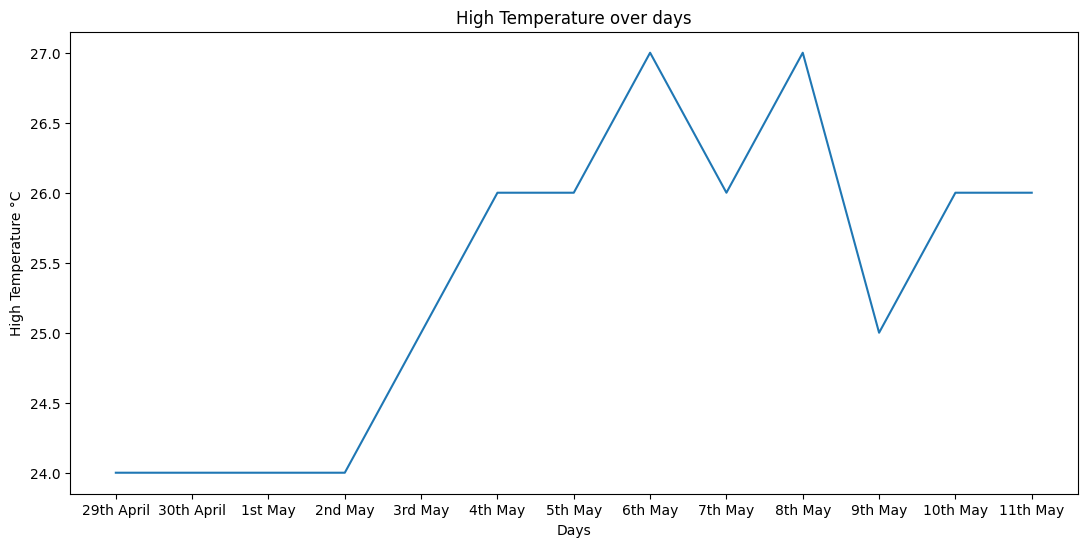

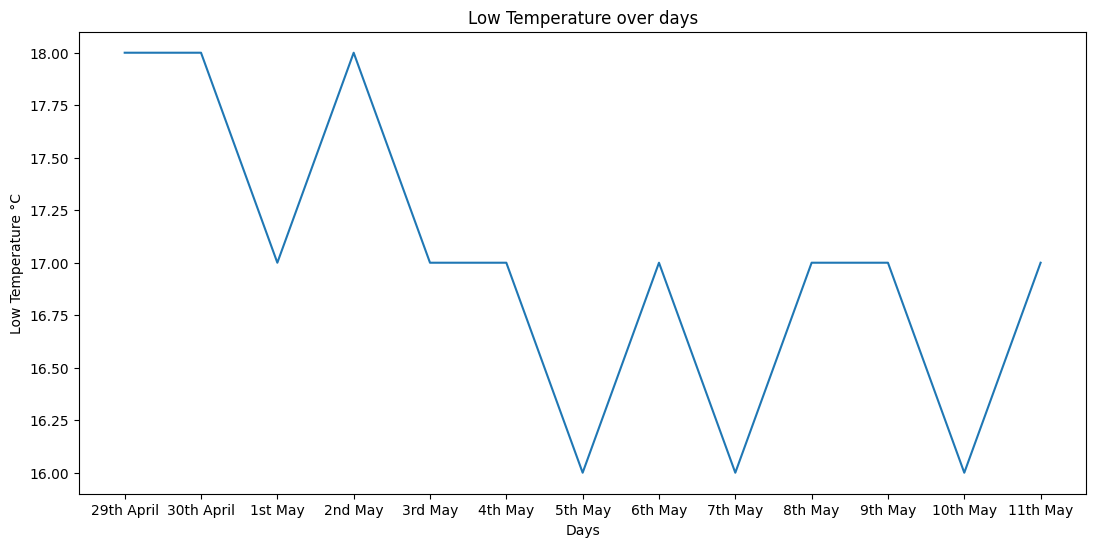

In [156]:
plt.figure(figsize=(13, 6))
sns.lineplot(data_days, x=(data_days['Date'] + " " + data_days['Month']), y=data_days['High Temperature Num'])

plt.ylabel('High Temperature °C')
plt.xlabel('Days')
plt.title('High Temperature over days')
plt.show()


plt.figure(figsize=(13, 6))
sns.lineplot(data_days, x=(data_days['Date'] + " " + data_days['Month']), y=data_days['Low Temperature Num'])

plt.ylabel('Low Temperature °C')
plt.xlabel('Days')
plt.title('Low Temperature over days')
plt.show()

<ipython-input-157-479e53da199e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set2')


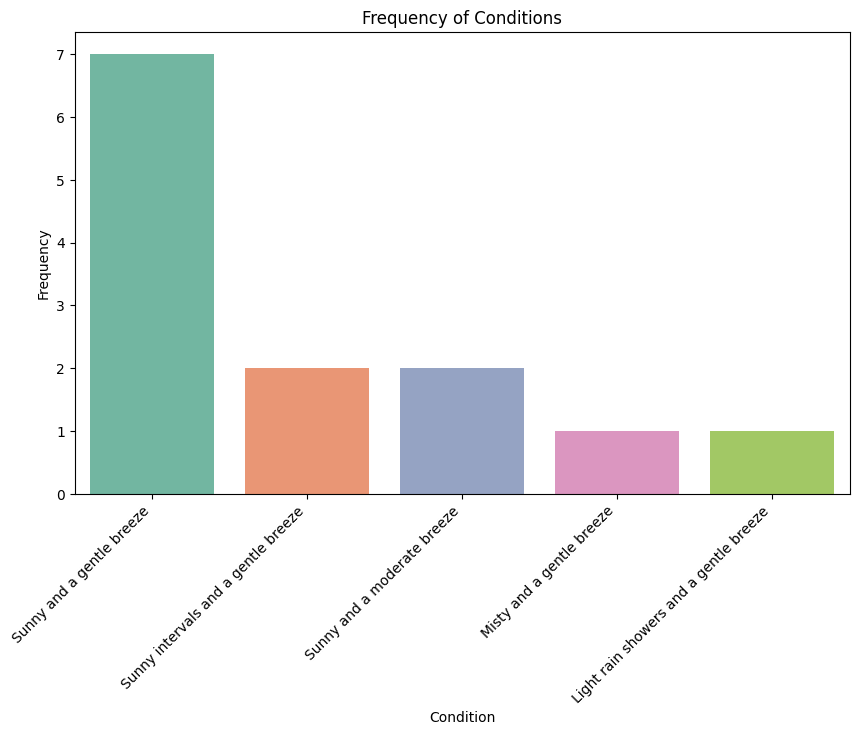

In [157]:

condition_counts = data_days['Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Conditions')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

In [158]:
data_hour.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
print(data_hour)

     Time Humidity 29th April Humidity 30th April Humidity 1st May  \
0   06:00                 93%                 91%              93%   
1   07:00                 91%                 90%              89%   
2   08:00                 87%                 84%              83%   
3   09:00                 83%                 82%              79%   
4   10:00                 77%                 76%              73%   
5   11:00                 74%                 73%              68%   
6   12:00                 71%                 70%              64%   
7   13:00                 71%                 70%              64%   
8   14:00                 70%                 68%              64%   
9   15:00                 69%                 68%              64%   
10  16:00                 70%                 69%              67%   
11  17:00                 71%                 69%              68%   
12  18:00                 74%                 72%              72%   
13  19:00           

In [159]:
print(data_hour.isnull().sum())

Time                     0
Humidity 29th April      0
Humidity 30th April      0
Humidity 1st May         0
Humidity 2nd May         0
Humidity 3rd May         0
Humidity 4th May         0
Humidity 5th May         0
Humidity 6th May         0
Humidity 7th May         0
Humidity 8th May         0
Humidity 9th May         0
Humidity 10th May        0
Humidity 11th May        0
Pressure 29th April      0
Pressure 30th April      0
Pressure 1st May         0
Pressure 2nd May         0
Pressure 3rd May         0
Pressure 4th May         0
Pressure 5th May         0
Pressure 6th May         0
Pressure 7th May         0
Pressure 8th May         0
Pressure 9th May         0
Pressure 10th May        0
Pressure 11th May        0
Visibility 29th April    0
Visibility 30th April    0
Visibility 1st May       0
Visibility 2nd May       0
Visibility 3rd May       0
Visibility 4th May       0
Visibility 5th May       0
Visibility 6th May       0
Visibility 7th May       0
Visibility 8th May       0
V

In [160]:
for i in range(1, 14):
    column_index = i
    data_hour.iloc[:, column_index] = data_hour.iloc[:, column_index].astype(str).str.rstrip('%').astype(int)

# Iterate over the pressure columns
for i in range(14, 27):
    column_index = i
    data_hour.iloc[:, column_index] = data_hour.iloc[:, column_index].astype(str).str.rstrip(' mb').astype(int)

print(data_hour)

     Time Humidity 29th April Humidity 30th April Humidity 1st May  \
0   06:00                  93                  91               93   
1   07:00                  91                  90               89   
2   08:00                  87                  84               83   
3   09:00                  83                  82               79   
4   10:00                  77                  76               73   
5   11:00                  74                  73               68   
6   12:00                  71                  70               64   
7   13:00                  71                  70               64   
8   14:00                  70                  68               64   
9   15:00                  69                  68               64   
10  16:00                  70                  69               67   
11  17:00                  71                  69               68   
12  18:00                  74                  72               72   
13  19:00           

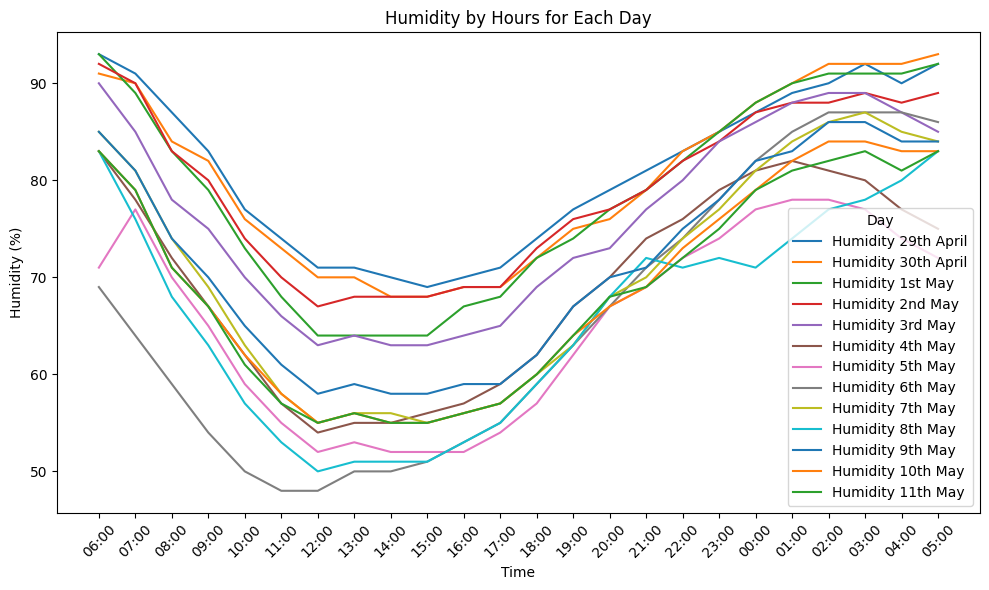

In [161]:
humidity_columns = data_hour.columns[1:14]

df_melted = data_hour.melt(id_vars='Time', value_vars=humidity_columns, var_name='Day', value_name='Humidity')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Time', y='Humidity', hue='Day', palette='tab10')
plt.title('Humidity by Hours for Each Day')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

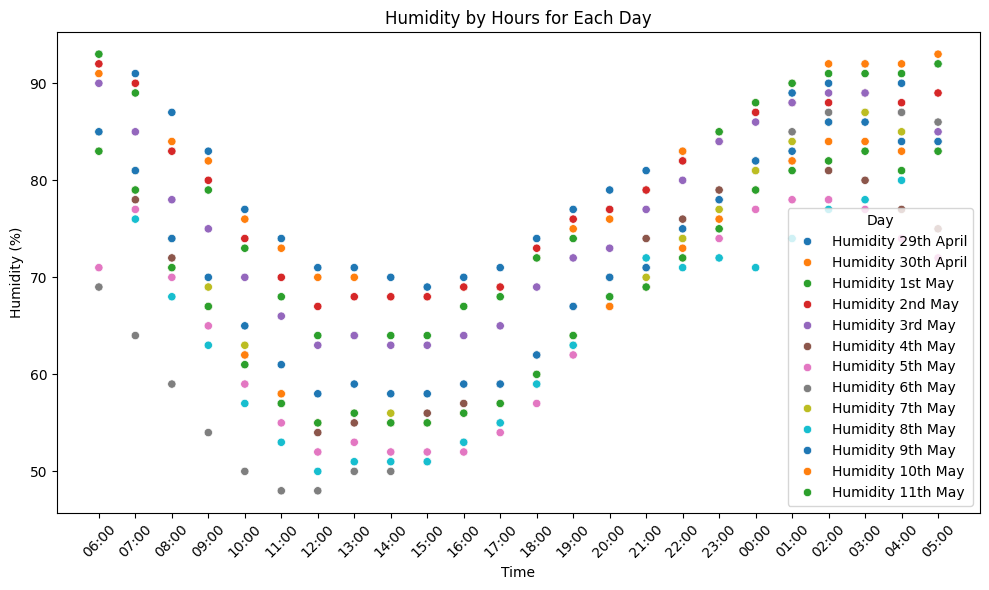

In [162]:
humidity_columns = data_hour.columns[1:14]

df_melted = data_hour.melt(id_vars='Time', value_vars=humidity_columns, var_name='Day', value_name='Humidity')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x='Time', y='Humidity', hue='Day', palette='tab10')
plt.title('Humidity by Hours for Each Day')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

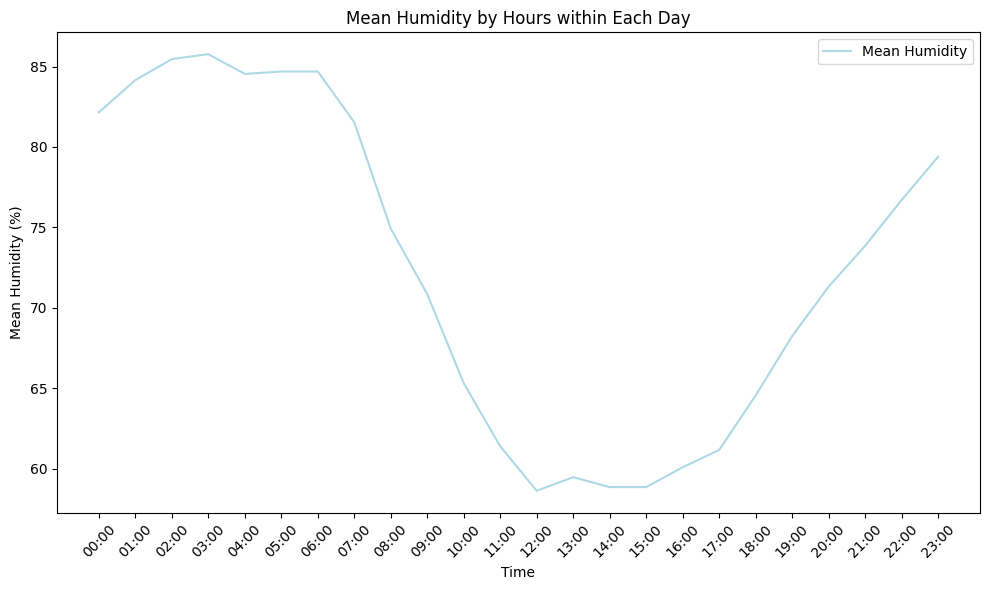

In [163]:
mean_humidity_per_hour = df_melted.groupby('Time')['Humidity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_humidity_per_hour, x='Time', y='Humidity', color='lightblue', label='Mean Humidity')

plt.title('Mean Humidity by Hours within Each Day')
plt.xlabel('Time')
plt.ylabel('Mean Humidity (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

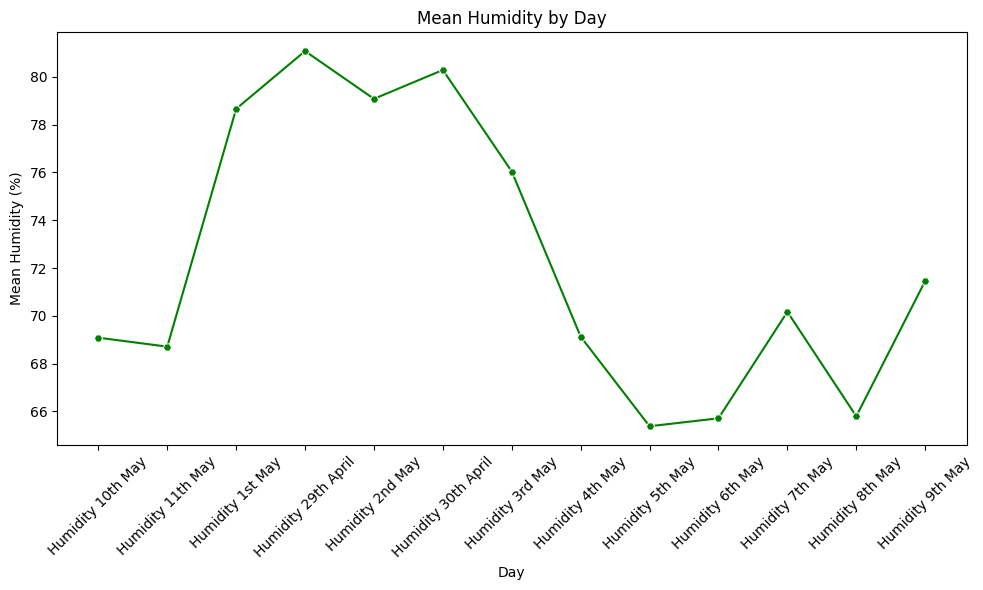

In [164]:
mean_humidity_per_day = df_melted.groupby('Day')['Humidity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_humidity_per_day, x='Day', y='Humidity', marker='H', color='green')

plt.title('Mean Humidity by Day')
plt.xlabel('Day')
plt.ylabel('Mean Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

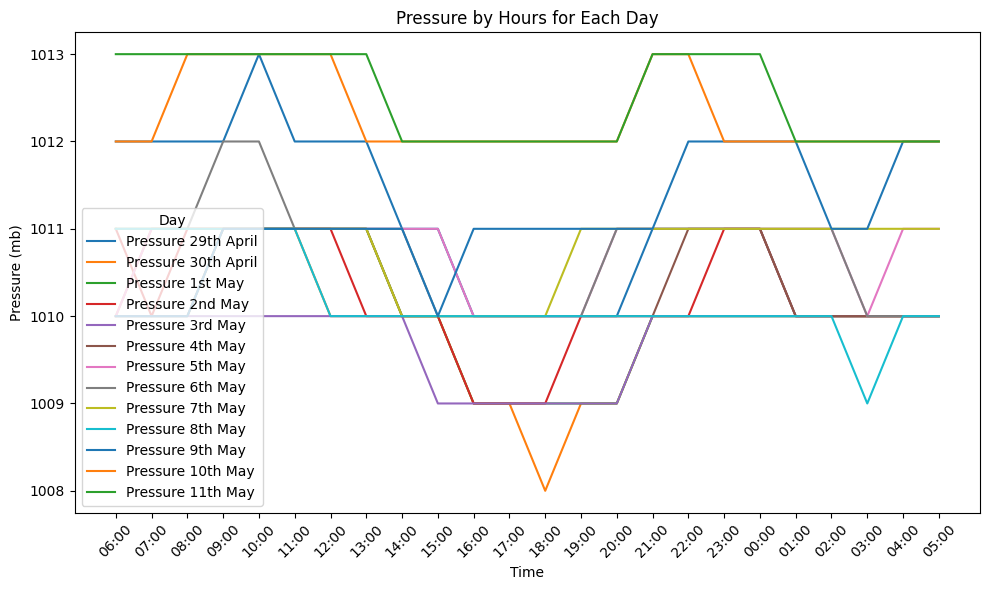

In [165]:
pressure_columns = data_hour.columns[14:27]

df_melted = data_hour.melt(id_vars='Time', value_vars=pressure_columns, var_name='Day', value_name='Pressure')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Time', y='Pressure', hue='Day', palette='tab10')
plt.title('Pressure by Hours for Each Day')
plt.xlabel('Time')
plt.ylabel('Pressure (mb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

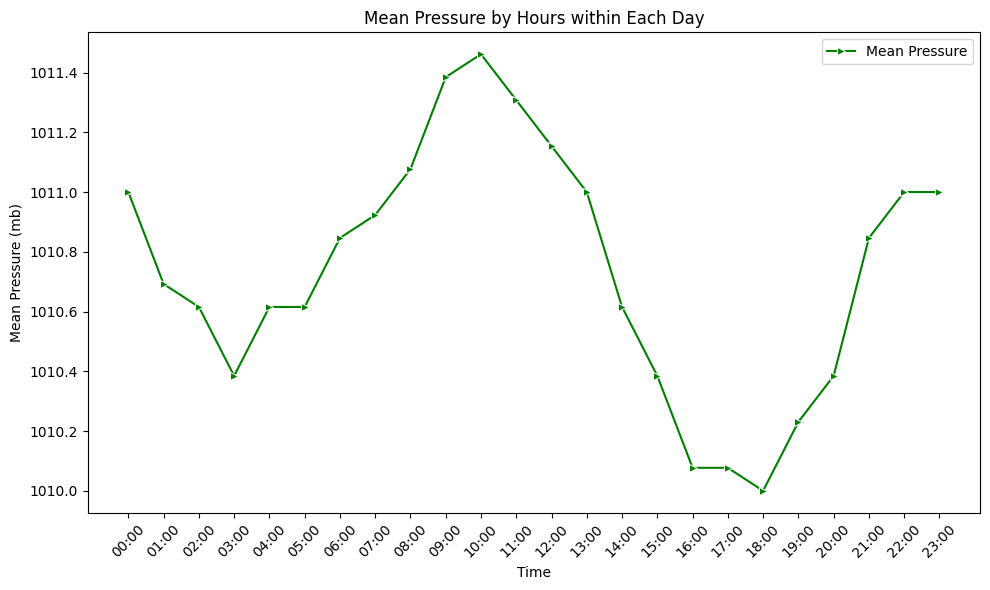

In [166]:
mean_pressure_per_hour = df_melted.groupby('Time')['Pressure'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_pressure_per_hour, x='Time', y='Pressure', label='Mean Pressure', marker='>', color='green')

plt.title('Mean Pressure by Hours within Each Day')
plt.xlabel('Time')
plt.ylabel('Mean Pressure (mb)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


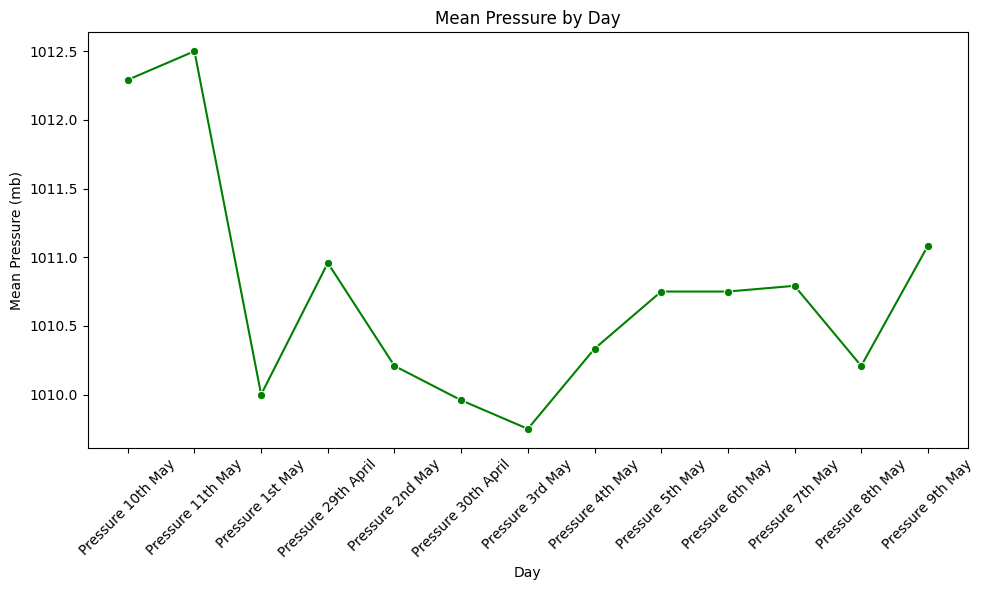

In [167]:
mean_pressure_per_day = df_melted.groupby('Day')['Pressure'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_pressure_per_day, x='Day', y='Pressure', marker='o', color='green')

plt.title('Mean Pressure by Day')
plt.xlabel('Day')
plt.ylabel('Mean Pressure (mb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [168]:
subset = data_hour.iloc[:, 27:40]
unique_values = np.unique(subset)
print(unique_values)

['Good' 'Moderate']


In [172]:
frequency_counts = {}

for col in data_hour.columns[27:40]:
    counts = data_hour[col].value_counts()
    frequency_counts[col] = counts

for col, counts in frequency_counts.items():
    print(f"{counts}\n")

Visibility 29th April
Good        22
Moderate     2
Name: count, dtype: int64

Visibility 30th April
Good    24
Name: count, dtype: int64

Visibility 1st May
Good        20
Moderate     4
Name: count, dtype: int64

Visibility 2nd May
Good    24
Name: count, dtype: int64

Visibility 3rd May
Good    24
Name: count, dtype: int64

Visibility 4th May
Good    24
Name: count, dtype: int64

Visibility 5th May
Good    24
Name: count, dtype: int64

Visibility 6th May
Good    24
Name: count, dtype: int64

Visibility 7th May
Good    24
Name: count, dtype: int64

Visibility 8th May
Good    24
Name: count, dtype: int64

Visibility 9th May
Good    24
Name: count, dtype: int64

Visibility 10th May
Good    24
Name: count, dtype: int64

Visibility 11th May
Good    24
Name: count, dtype: int64



**Report**

In our dataset we can see that highest temperature was on the 6th May 2024  and the lowest on the 5th May 2024. The most days was sunny with a gentle breeze. We can see that the high temperature rise from 4th of May till 8th of May and than drops, but the low temprature is constantly rising and falls decreasing over time.
We can see the sure trend that the humidity fallse from 6 a.m. and start rising from 7 p.m. The lowest humidity over day is from 11a.m till 3 p.m. The same tendence with a mean of hourly humidity by days.
We can see that the days with highest humidity is from 29th of April till 2nd of May, and after that the humidity is fallse.
Conserning the pressure, we can see that the during the day it's up and down but the difference is so small that it's not influence on the humans.
An we can see that most of the days the visibility is Good.
So, all of the above mentioned show us the good weather with moderate temperature, relatively average humidity and good visibility.